In [3]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
myFile = uproot.open('RootFile1.root')

In [5]:
tree = myFile['TestTree']

In [6]:
eventId = tree.array('eventId')
pfoId = tree.array('pfoId')
driftPos = tree.array('hitDriftPositionsW')
wirePos = tree.array('hitWirePositionsW')
pdg = tree.array('bestMCParticlePdgCode')
isTrack = tree.array('bestMCParticleIsTrack')
completeness = tree.array('completeness')
purity = tree.array('purity')

myFile.close()

# Put a cut on purity and completeness 

In [7]:
select_pfos_len = np.array([ len(x) for x in driftPos])

select_pfos = np.where((completeness > 0.79) & (purity > 0.89) & (select_pfos_len > 0))

# Make new drift and wire position arrays with PFOs that pass the cut

In [8]:
select_driftPos = driftPos[select_pfos]
select_wirePos = wirePos[select_pfos]

# Calculate average drift and wire position

In [9]:
drift_pos_av = driftPos[select_pfos].mean()
wire_pos_av = wirePos[select_pfos].mean()

# Calculate the gradient and intercept

In [10]:
grad = []
inter = []
rsq_values = []

In [34]:
for i in range(len(select_driftPos)):
    drift_comp = select_driftPos[i] - drift_pos_av[i]
    wire_comp = select_wirePos[i] - wire_pos_av[i]
    drift_comp_sq = drift_comp ** 2
    numerator = np.sum(drift_comp * wire_comp)
    denominator = np.sum(drift_comp_sq)
    m = numerator / denominator
    c = wire_pos_av[i] - m * drift_pos_av[i]
    grad.append(m)
    inter.append(c)
    
    y = grad[i] * select_driftPos[i] + inter[i]
    
    xy_prod_mean = (select_driftPos[i] * select_wirePos[i]).mean()
    xy_mean_prod = drift_pos_av[i] * wire_pos_av[i]
    numer = xy_prod_mean - xy_mean_prod
    
    drift_pos_sq_mean = (select_driftPos[i] ** 2).mean()
    drift_pos_av_sq = (drift_pos_av[i]) ** 2
    
    wire_pos_sq_mean = (select_wirePos[i] ** 2).mean()
    wire_pos_av_sq = (wire_pos_av[i]) ** 2
    
    denom1 = drift_pos_sq_mean - drift_pos_av_sq
    denom2 = wire_pos_sq_mean - wire_pos_av_sq
    
    denom_prod = - denom1 * denom2
    denom = np.sqrt(denom_prod)
    
    


-6540124.739183306
-27703.817038439916
-208060.01157445833
-1467.3901008158593
-4700.5563182267215
-51.57210970278759
-25490.820005095753
-2567.916773030808
-715.6278677772427
-8739.090432103283
-331160.51125793305
-0.6477534680690662
-0.08516874306584395
-14126.143233842608
-2573095.1354090464
-170547.60843266532
-0.4848857239821686
-22359.114286741235
-282.6548428811085
-512.1174505965663
-0.6791315255081931
-18287.760519483876
-62.493233647224535
-322.36241736996317
-155.0975213862091
-2352.1306493677084
-8102.207506060726
-1400.5514376742922
-2033.0360450753803
-1384677.9154995542
-5.649507795862727


C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


# Plot regression line on PFOs

C:\Users\r.xavier\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


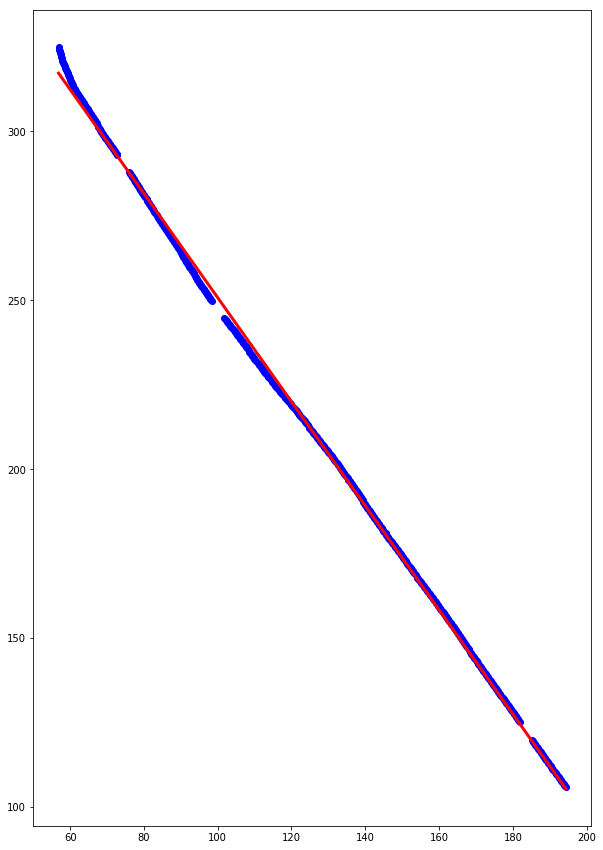

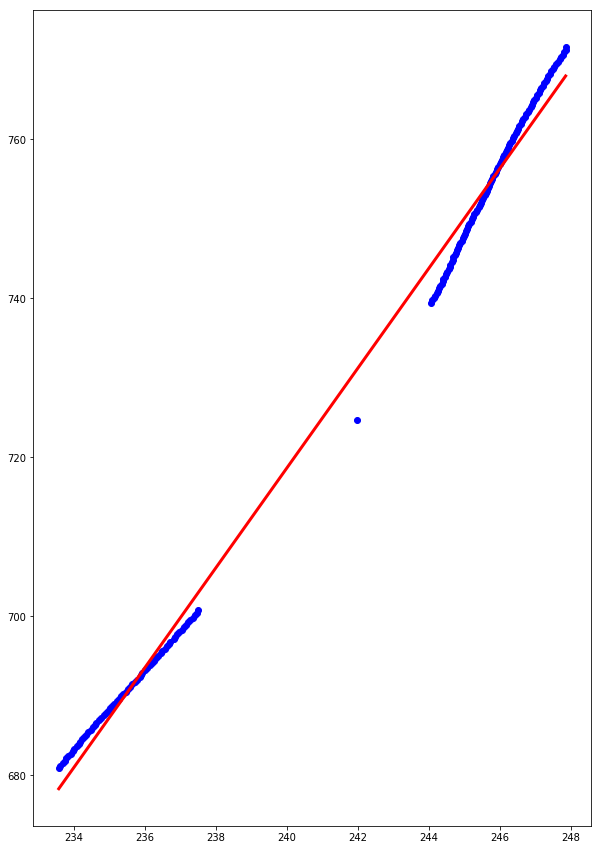

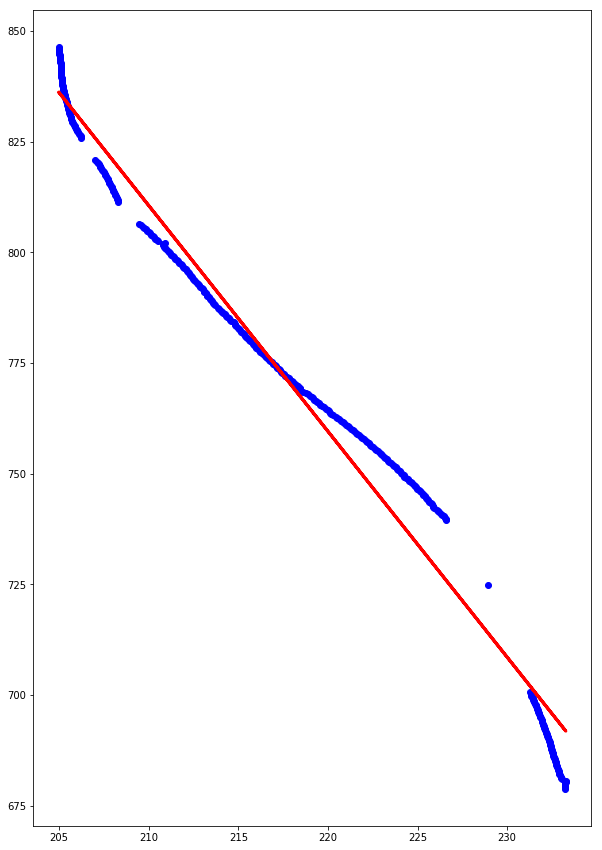

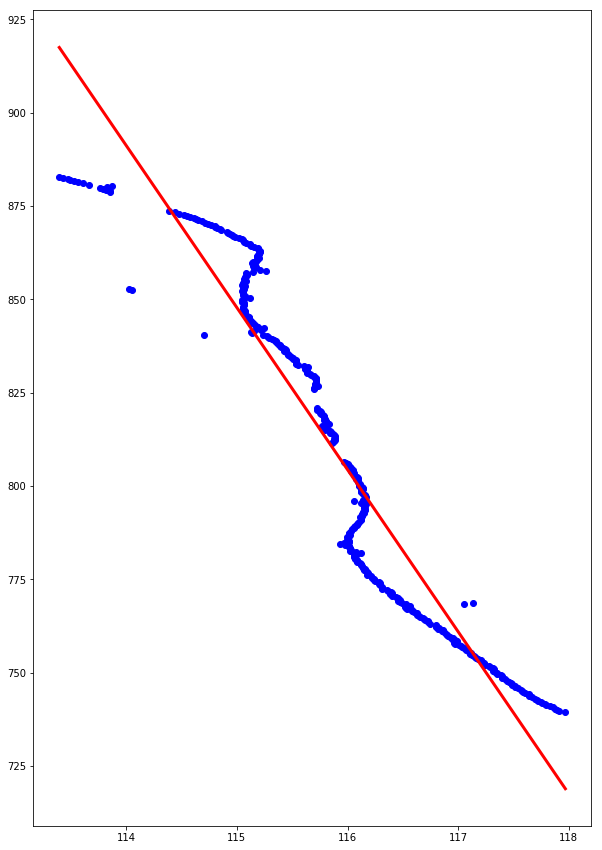

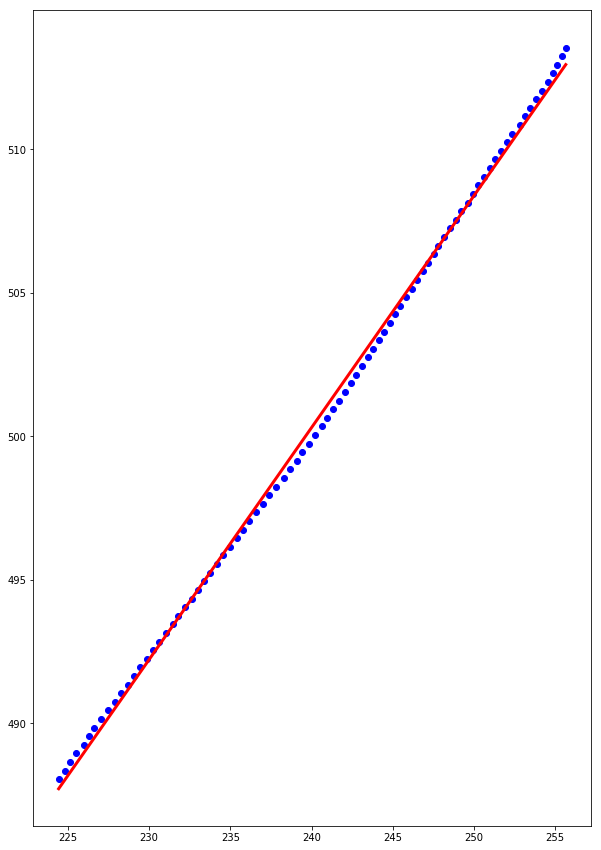

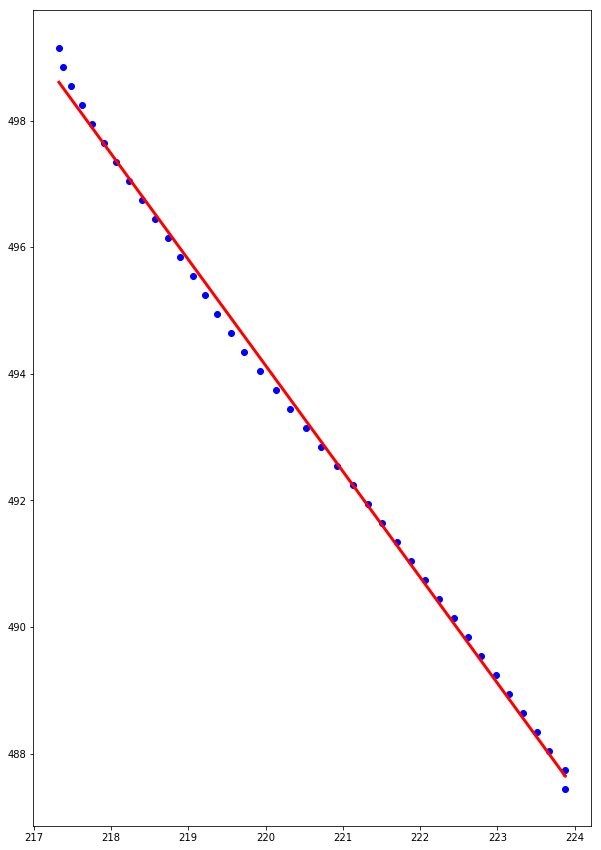

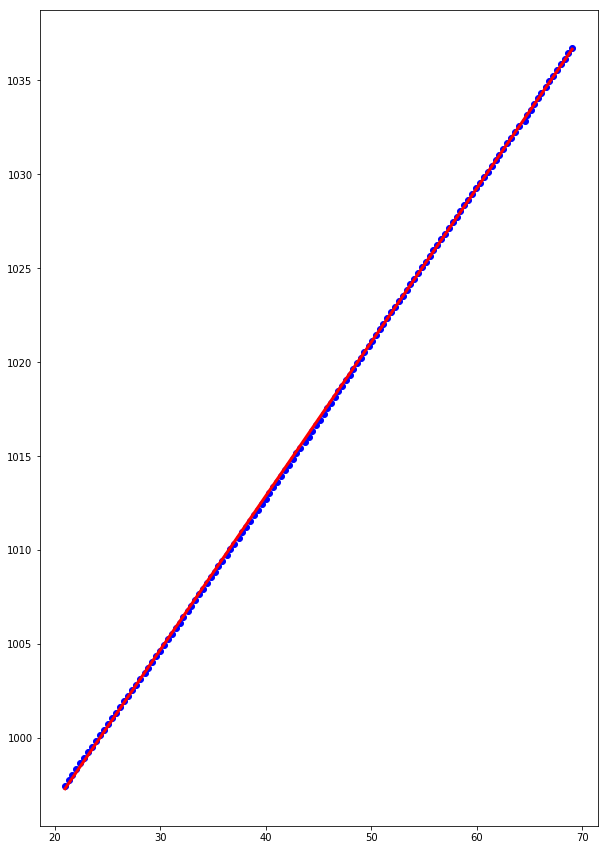

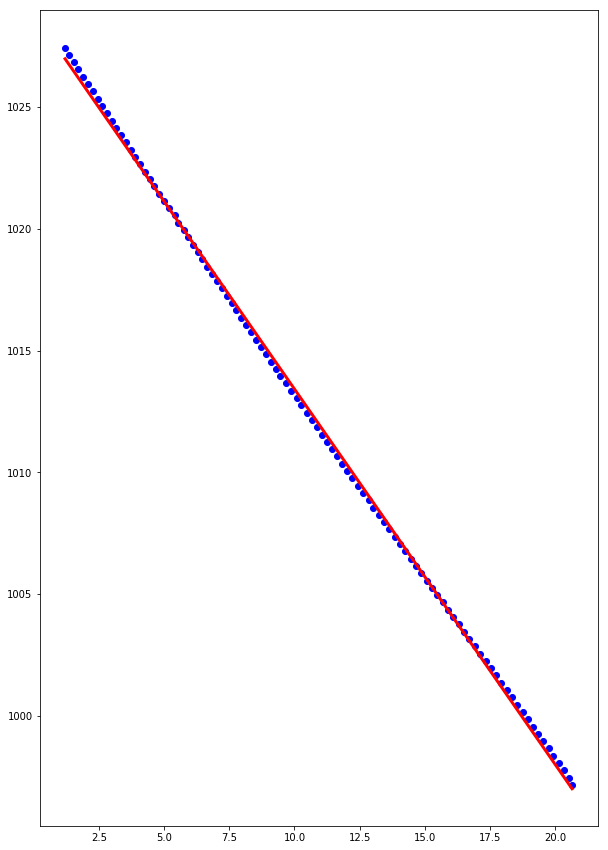

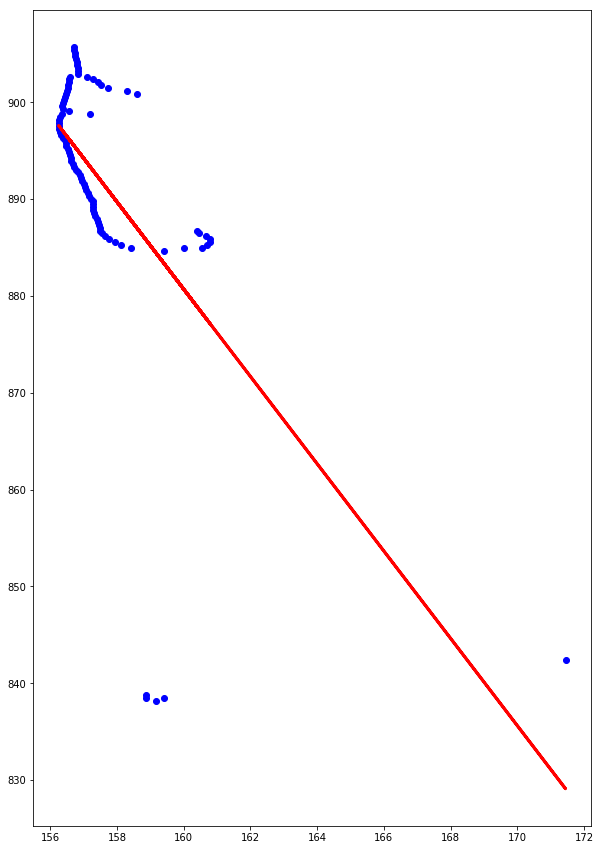

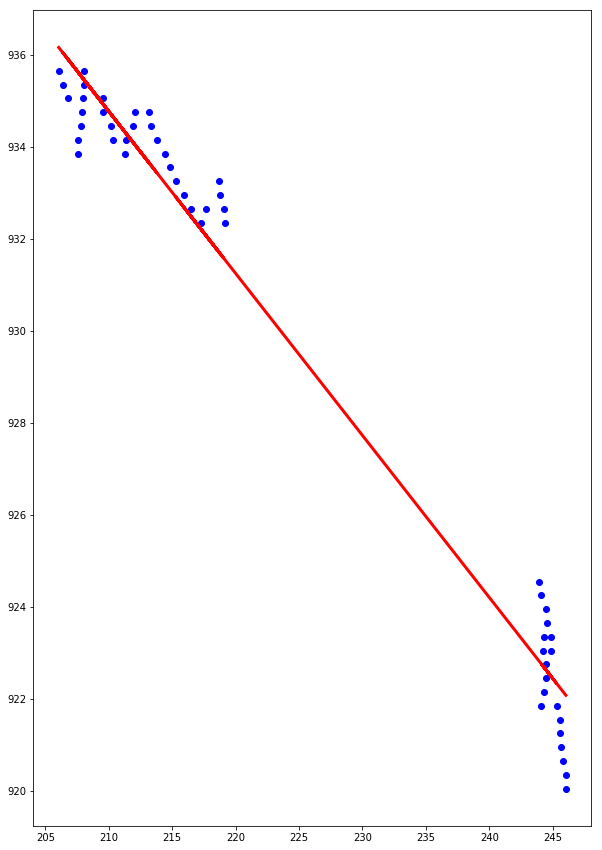

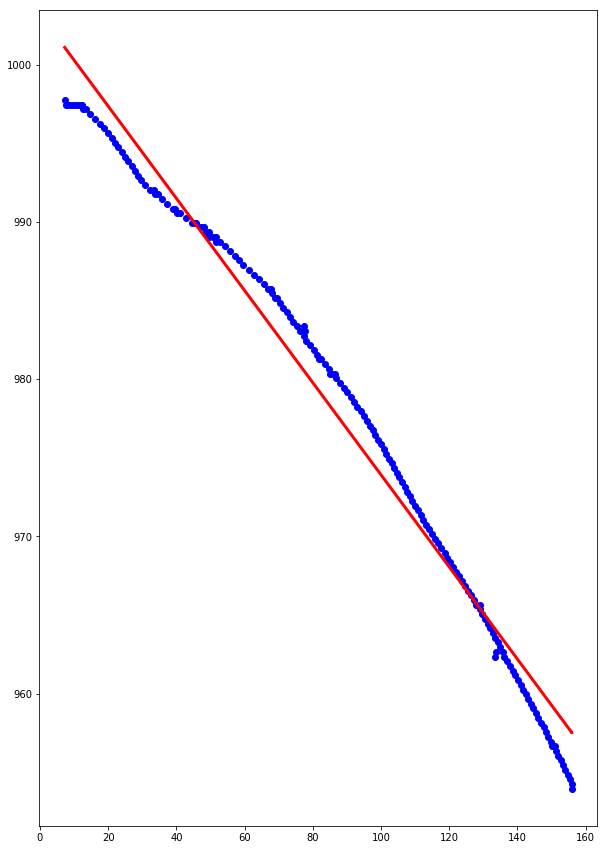

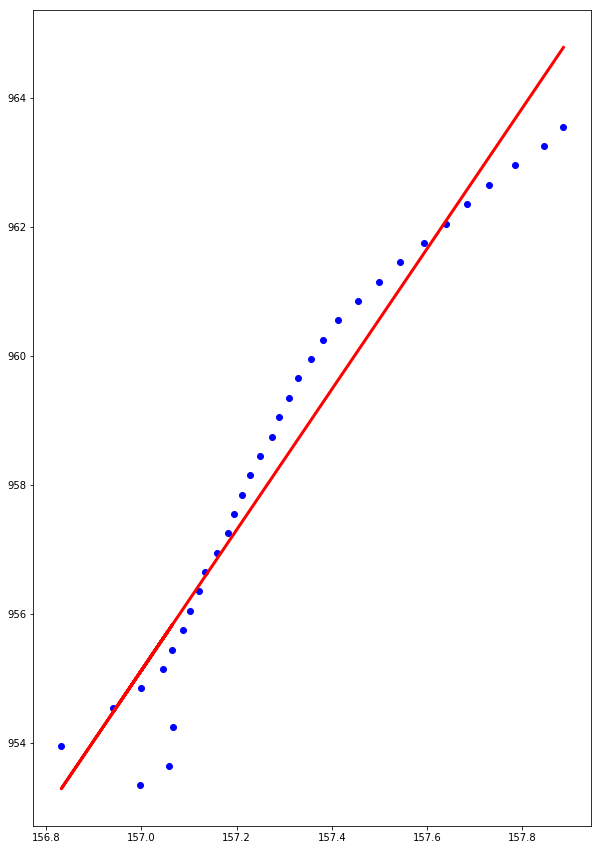

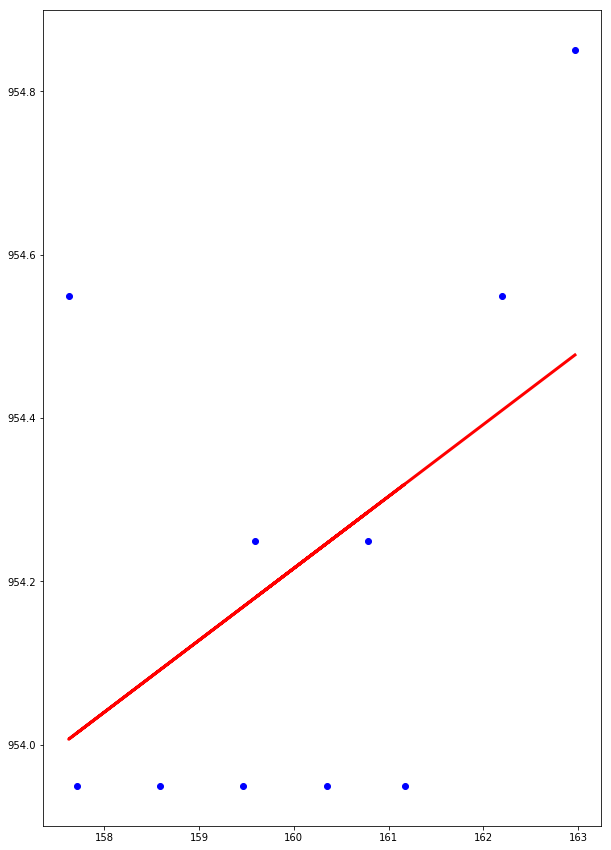

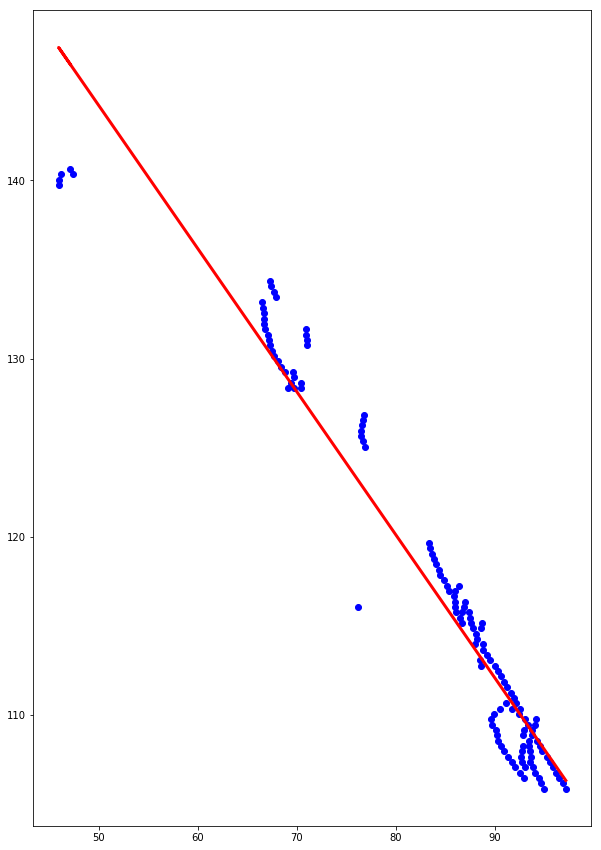

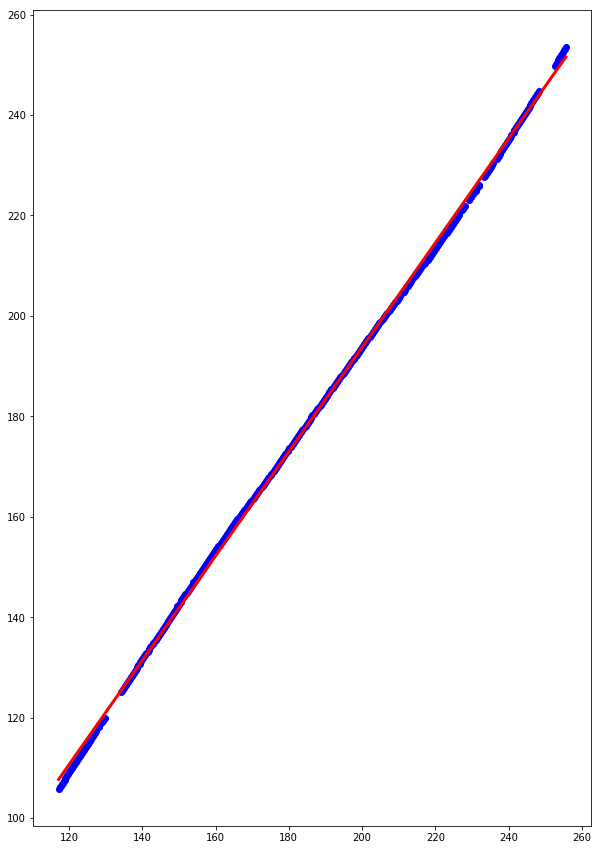

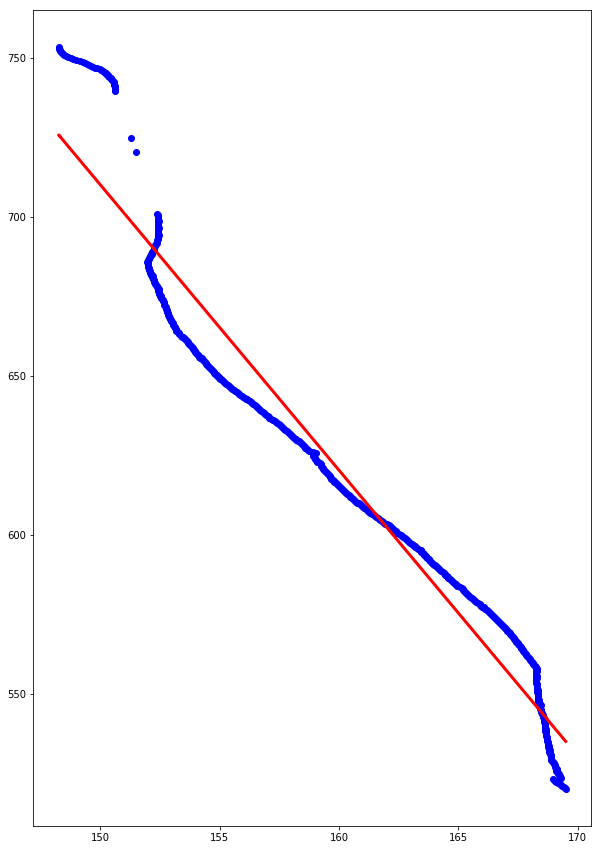

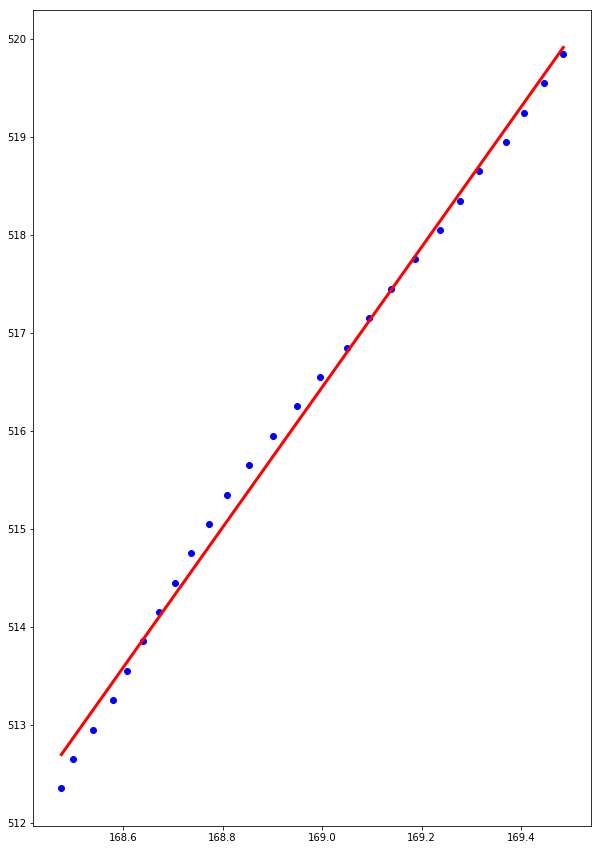

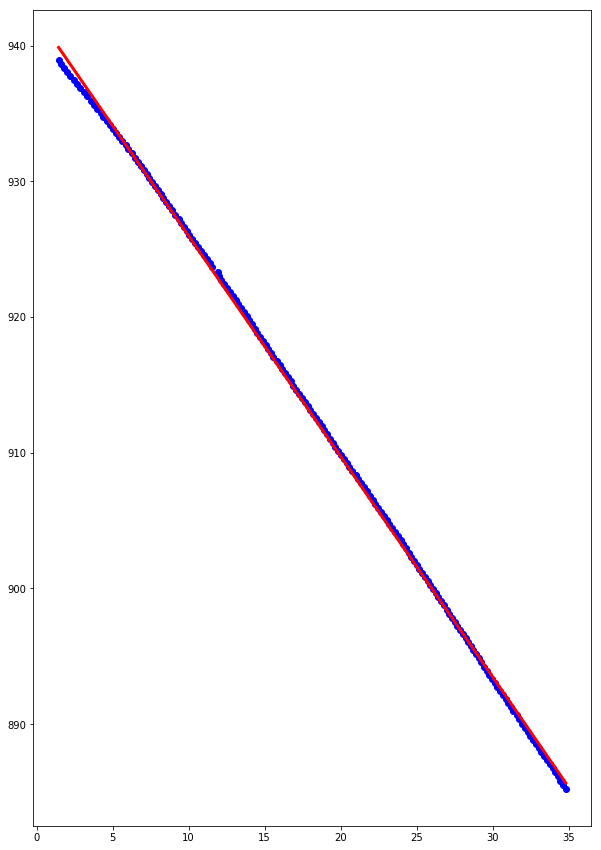

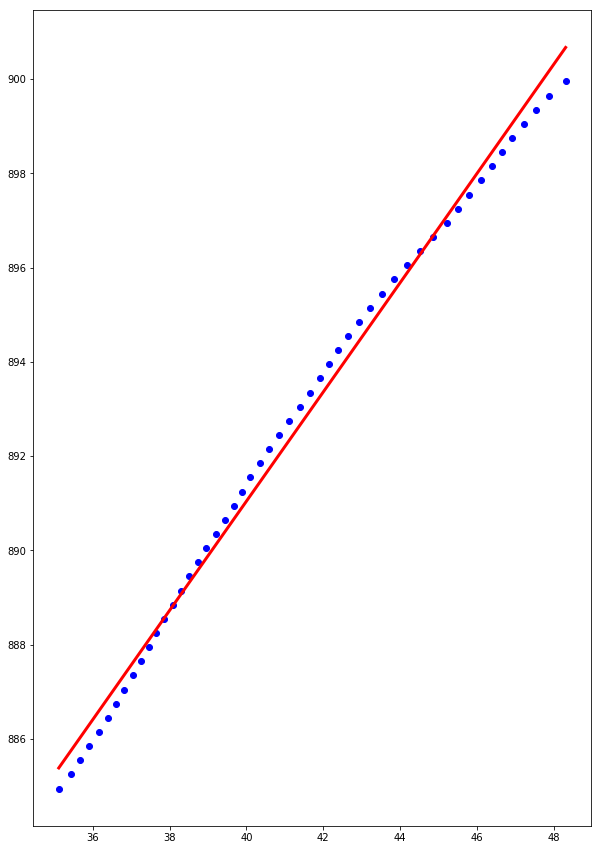

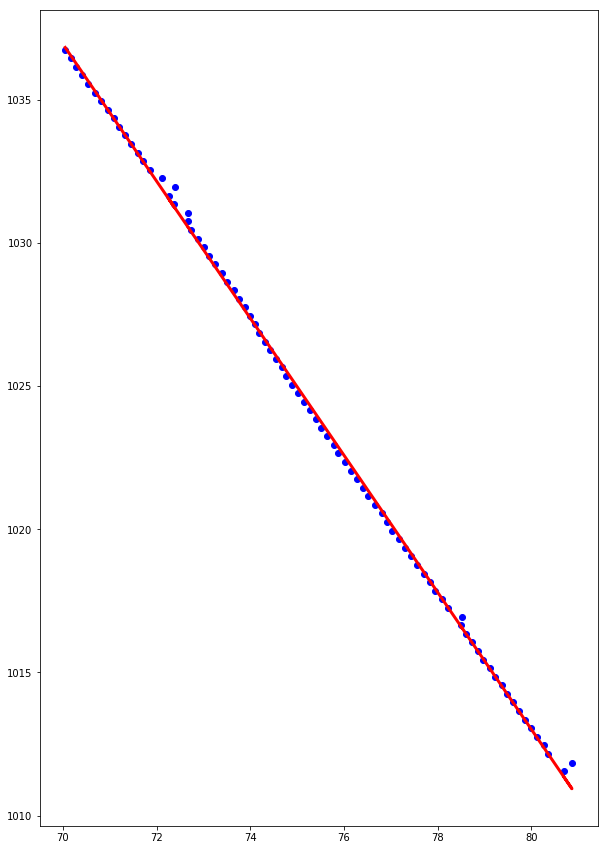

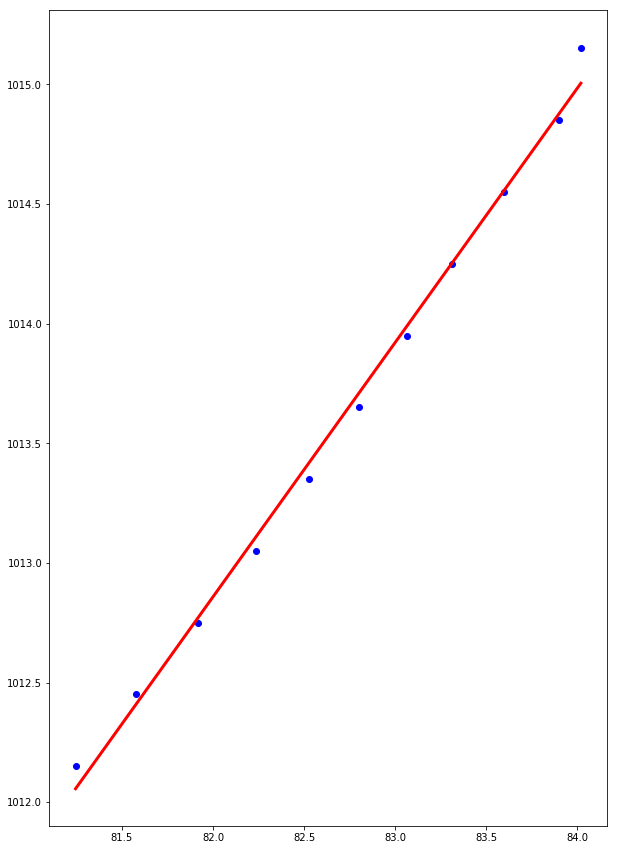

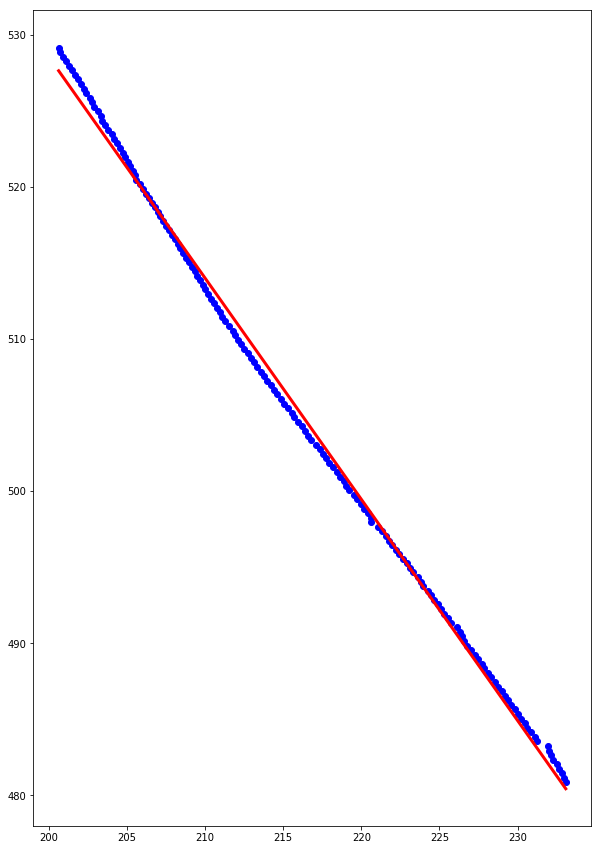

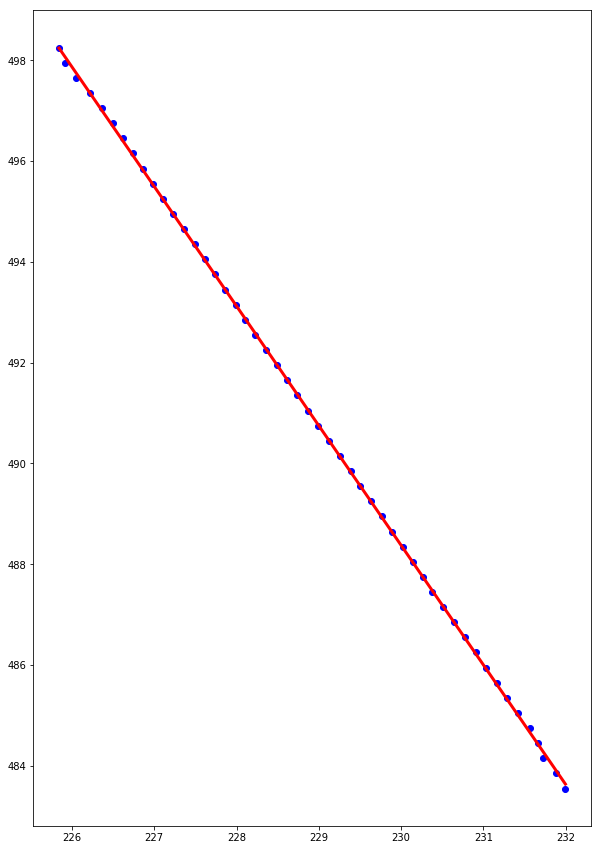

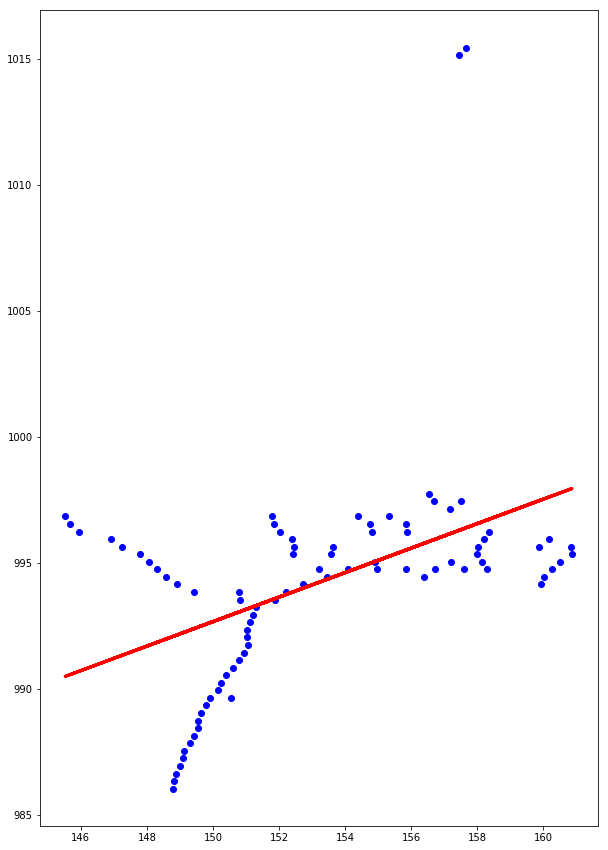

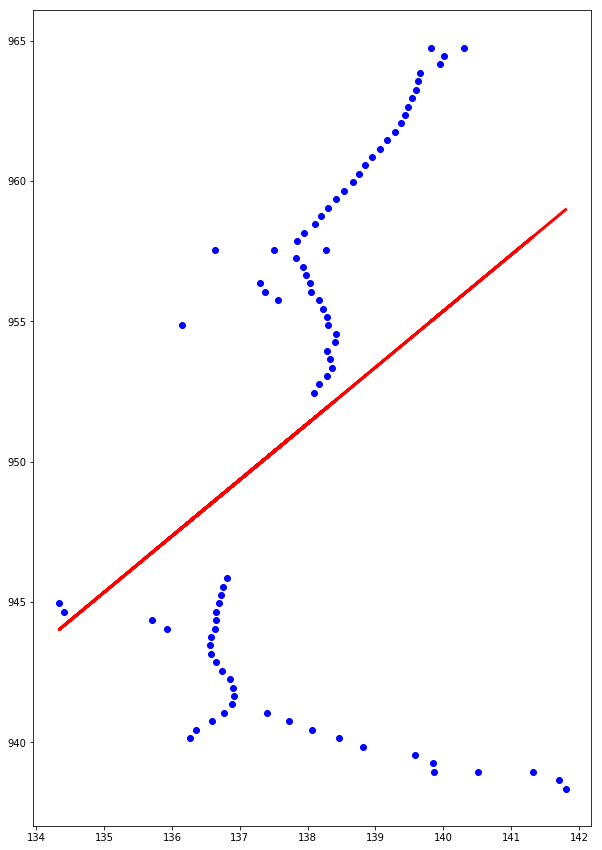

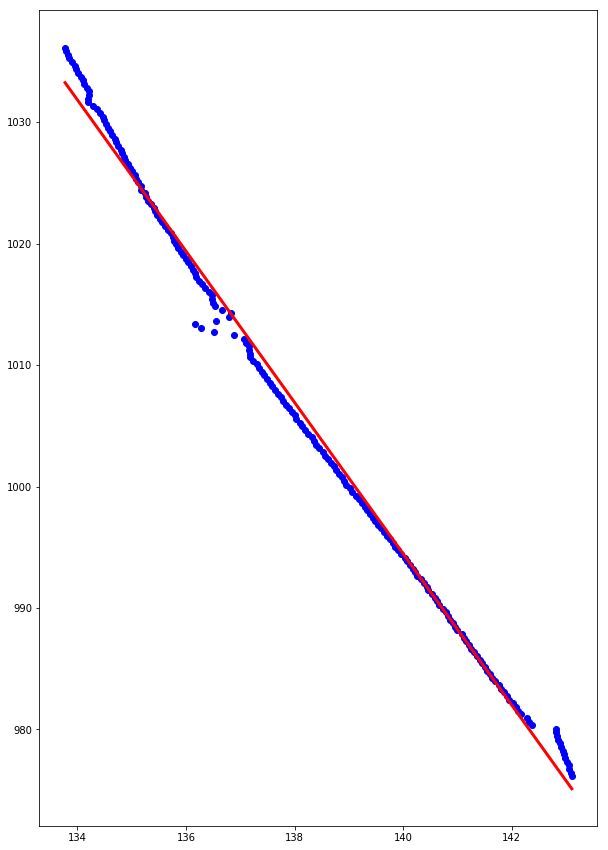

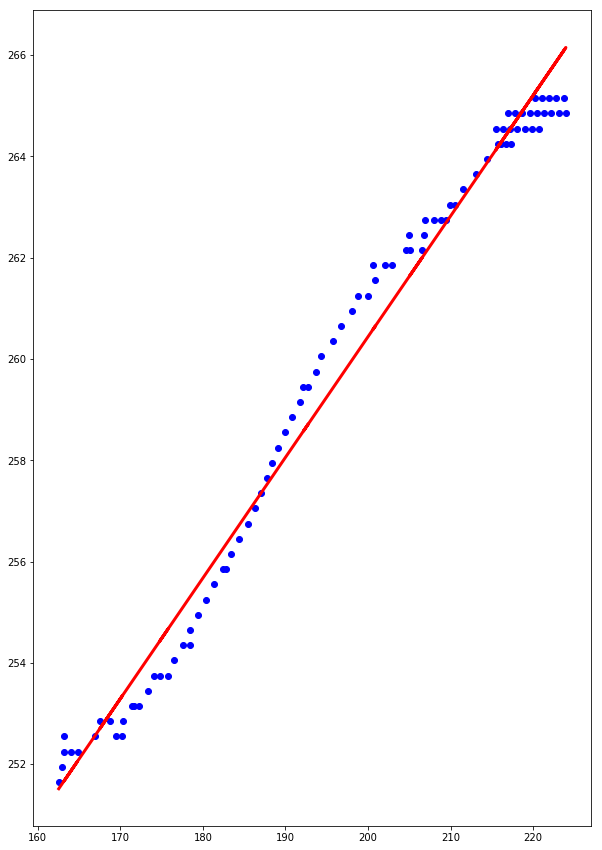

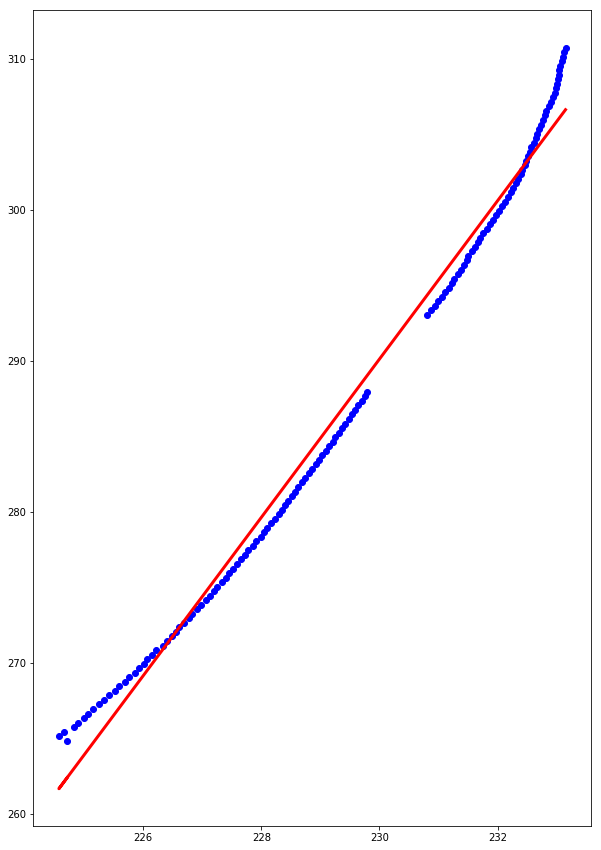

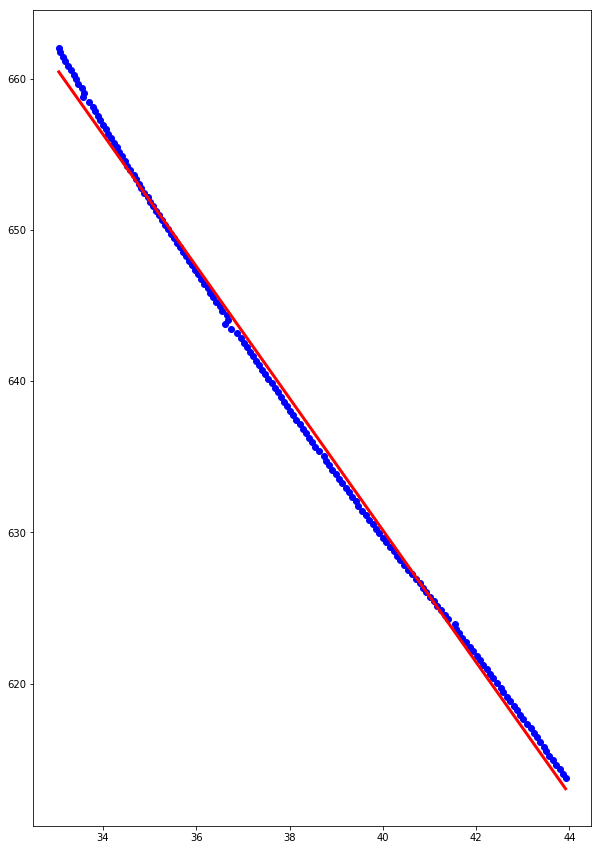

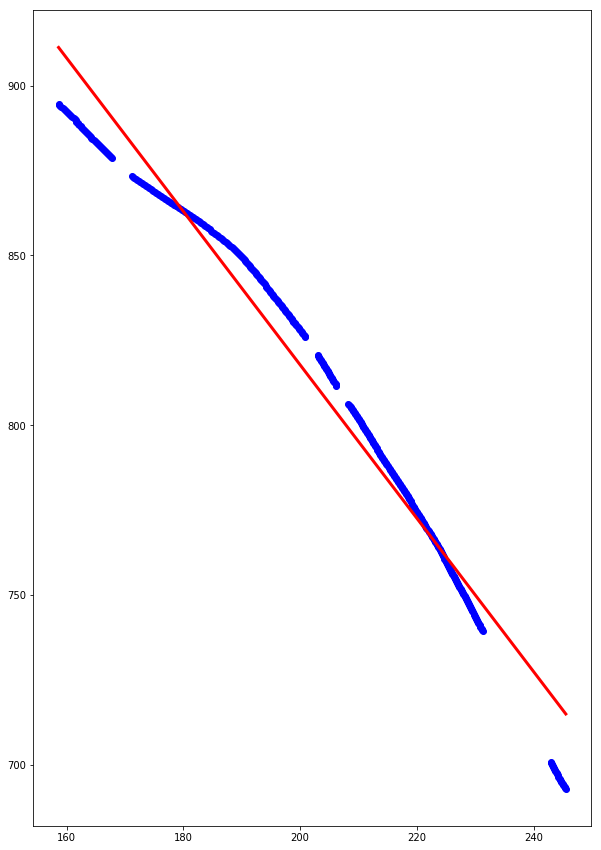

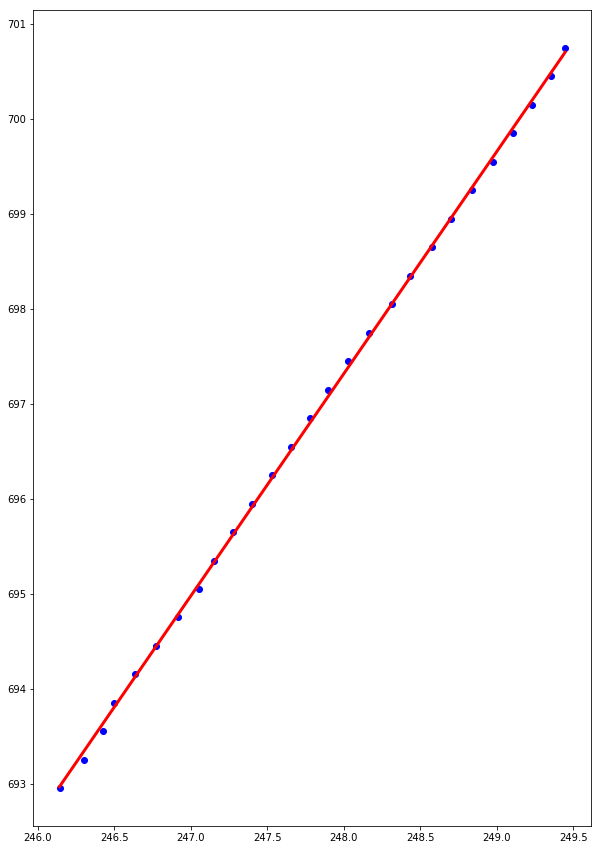

In [33]:
for i in range(len(select_driftPos)):
    y = grad[i] * select_driftPos[i] + inter[i]
    fig = plt.figure(figsize = (10, 15))
    plt.scatter(select_driftPos[i], select_wirePos[i], color = 'b')
    plt.plot(select_driftPos[i], y, color = 'r', linewidth = 3)

# Histogram of R squared coefficient

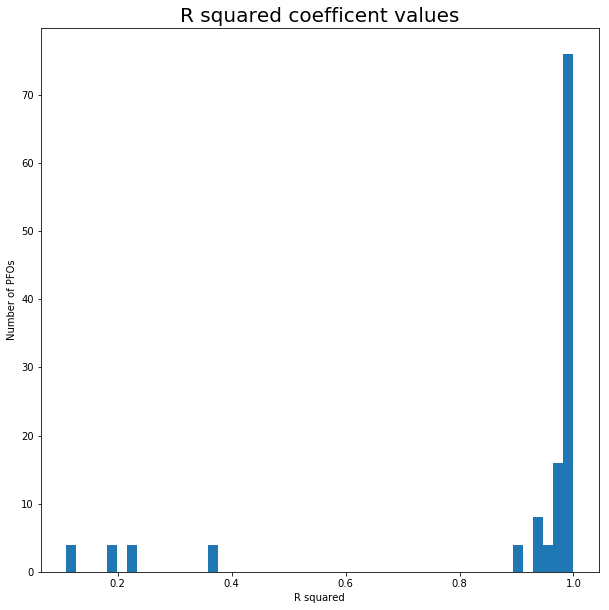

In [38]:
fig = plt.figure(1, figsize=(10, 10))
hist1 = plt.hist(rsq_values, 50)
plt.title('R squared coefficent values', fontsize = 20)
plt.xlabel('R squared')
plt.ylabel('Number of PFOs')

plt.show()

In [39]:
track_pfos = np.where((completeness > 0.79) & (purity > 0.89) & (select_pfos_len > 0) & (isTrack == 1))
shower_pfos = np.where((completeness > 0.79) & (purity > 0.89) & (select_pfos_len > 0) & (isTrack == 0))

In [57]:
print(select_pfos)
print(track_pfos)
print(shower_pfos)



(array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15, 16, 17, 18, 22, 23,
       24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 42, 43],
      dtype=int64),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 16, 18, 22, 23, 24, 25, 26,
       27, 28, 29, 33, 35, 36, 37, 42, 43], dtype=int64),)
(array([12, 13, 17, 31, 32], dtype=int64),)
